In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans


In [115]:
df = pd.read_csv("mall_customer_segmentation_extended.csv")

display(df.head())
display(df.corr(numeric_only=True))

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Visit_Frequency,Avg_Spending_Per_Visit,Customer_Type,Preferred_Shopping_Category
0,1,Female,31,19654,48,14,207,Regular,Entertainment
1,2,Female,24,25542,82,28,432,Occasional,Entertainment
2,3,Male,49,118440,79,8,129,Occasional,Electronics
3,4,Male,53,27553,99,15,328,Regular,Electronics
4,5,Male,33,108955,69,1,448,First-time,Entertainment


,Customer_ID,Age,Annual_Income,Spending_Score,Visit_Frequency,Avg_Spending_Per_Visit
Customer_ID,1.000000,-0.036904,0.075115,0.004027,0.023691,-0.068743
Age,-0.036904,1.000000,0.053836,0.101226,0.014505,-0.012083
Annual_Income,0.075115,0.053836,1.000000,-0.000384,-0.034355,-0.002976
Spending_Score,0.004027,0.101226,-0.000384,1.000000,0.019747,0.010836
Visit_Frequency,0.023691,0.014505,-0.034355,0.019747,1.000000,-0.002585
Avg_Spending_Per_Visit,-0.068743,-0.012083,-0.002976,0.010836,-0.002585,1.000000


In [117]:
df

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Visit_Frequency,Avg_Spending_Per_Visit,Customer_Type,Preferred_Shopping_Category
0,1,Female,31,19654,48,14,207,Regular,Entertainment
1,2,Female,24,25542,82,28,432,Occasional,Entertainment
2,3,Male,49,118440,79,8,129,Occasional,Electronics
3,4,Male,53,27553,99,15,328,Regular,Electronics
4,5,Male,33,108955,69,1,448,First-time,Entertainment
...,...,...,...,...,...,...,...,...,...
495,496,Female,37,31296,89,18,69,Regular,Electronics
496,497,Male,55,46395,49,23,153,Occasional,Groceries
497,498,Male,69,19450,78,25,70,Occasional,Electronics
498,499,Female,48,96104,24,3,89,First-time,Electronics


C:\Users\manav\python\manav.py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


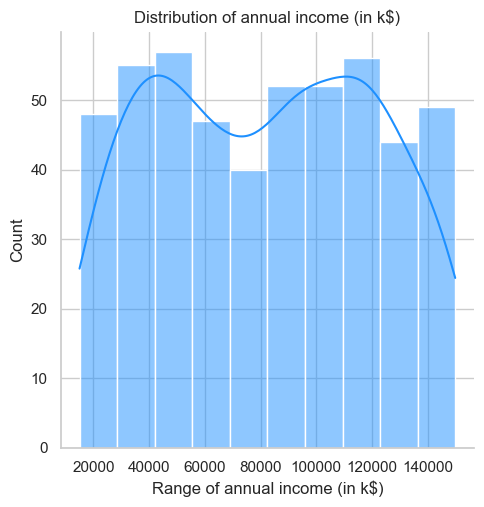

In [119]:
sns.set(style="whitegrid")
sns.displot(df["Annual_Income"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

C:\Users\manav\python\manav.py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


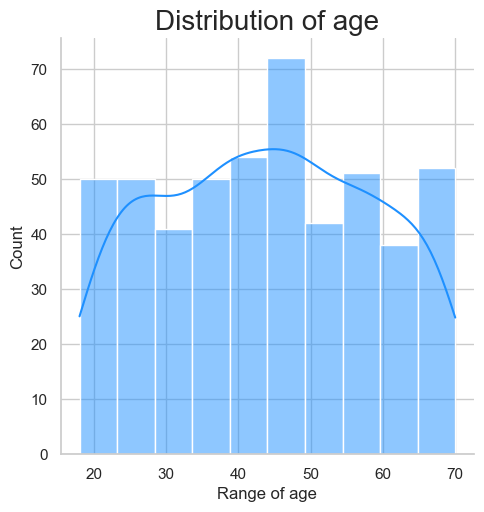

In [121]:
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

C:\Users\manav\python\manav.py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


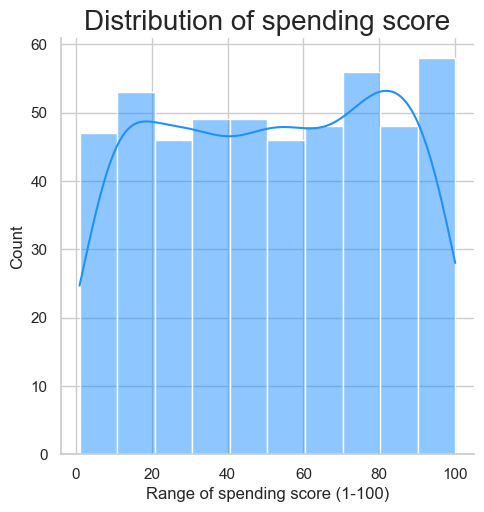

In [123]:
sns.set(style="whitegrid")
sns.displot(df["Spending_Score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

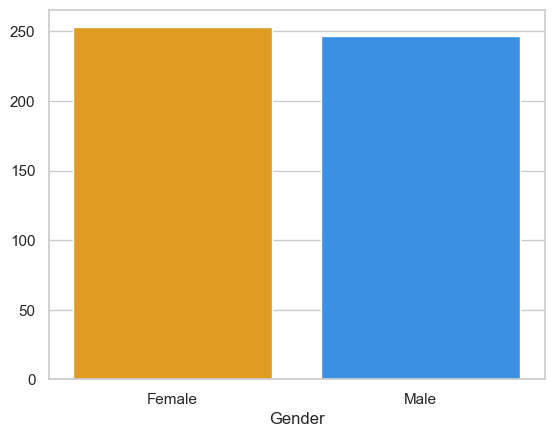

In [125]:
genders = df["Gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [127]:
X = df[["Annual_Income", "Spending_Score"]]
X.head()

,Annual_Income,Spending_Score
0,19654,48
1,25542,82
2,118440,79
3,27553,99
4,108955,69


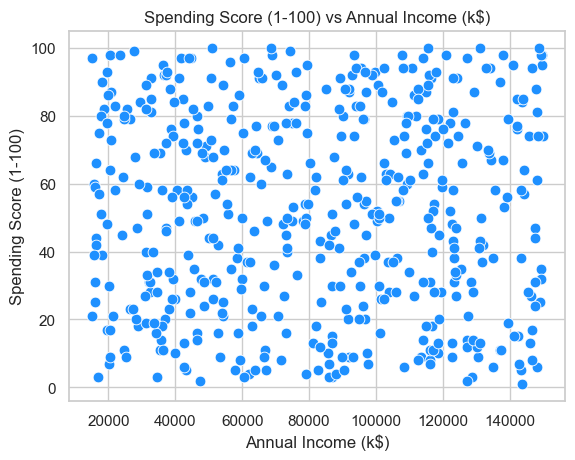

In [129]:
sns.scatterplot(x="Annual_Income", y="Spending_Score", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

C:\Users\manav\python\manav.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manav\python\manav.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manav\python\manav.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manav\python\manav.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

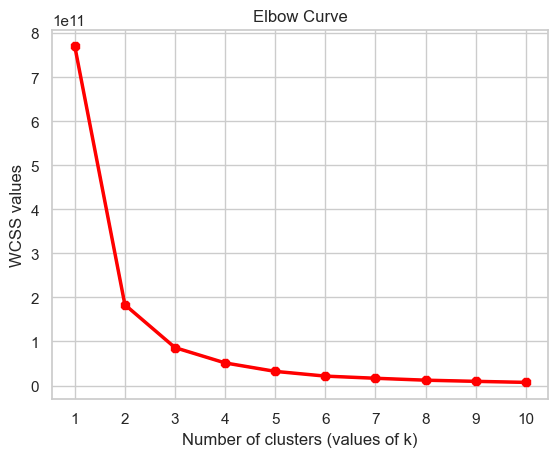

In [131]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [132]:
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

C:\Users\manav\python\manav.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Visit_Frequency,Avg_Spending_Per_Visit,Customer_Type,Preferred_Shopping_Category,label
0,1,Female,31,19654,48,14,207,Regular,Entertainment,4
1,2,Female,24,25542,82,28,432,Occasional,Entertainment,4
2,3,Male,49,118440,79,8,129,Occasional,Electronics,1
3,4,Male,53,27553,99,15,328,Regular,Electronics,4
4,5,Male,33,108955,69,1,448,First-time,Entertainment,1


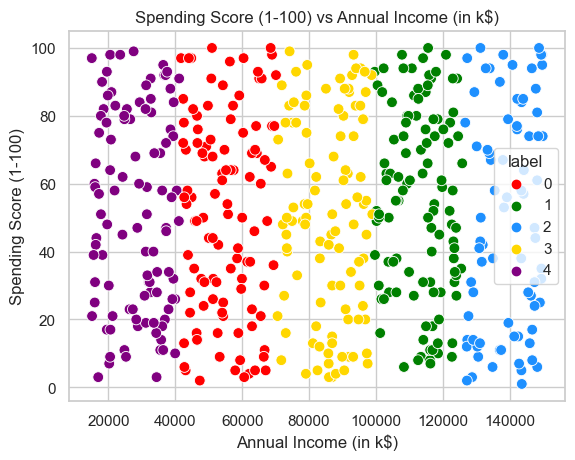

In [135]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()